# Data Science Taste Test - Exercise on IBM HR Data
## brAIn.hr

### 3. The Data Science Workflow (General Assembly Model)

![GA Pipeline](./assets/general_assembly_pipeline.png)

- Frame - Problems & Hypotheses 
- Prepare - Ingestion & Cleaning
- Analyze - Studying the Data
- Interpret - Inference & Prediction
- Communicate/Deploy - Enabling Decisions

Practicing Data Science & Machine Learning skills is going to require that you get hands-on with datasets solving problems that are interesting to you. Fortunately, there are now tons of places you can go to access data and practice running models. The most prominent one is Kaggle. They run paid competitions to see whose models can drive the most accurate results, and you can see other people's projects and approaches to assessing data and running predictive models. 

Even better than Kaggle is working with data that you're already using at work. If you're able to install python in your work environment, then you have the best source of all to practice.

Today's dataset should be in the repository folder you downloaded, but if not, access it here: [Kaggle: IBM](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

### Before we dive into the data...

The cell below installs a tool vital for graphing and visualizing some of our machine learning models. 

Notice the code comments that begin with "#". For your notebooks and code to be explainable, you have to use comments and docstrings """ """ heavily. You'll see more of this as you scroll through. 

In [ ]:
#import sys
#!conda install -c pyviz --yes --prefix {sys.prefix} hvplot
#!conda install jupyterlab
#!jupyter labextension install -y @pyviz/jupyterlab_pyviz

The cell below installs a tool vital for graphing and visualizing some of our machine learning models. 

In [1]:
import sys
!pip install --prefix {sys.prefix} graphviz  # enables visualization of decision trees - key library
!pip install --prefix {sys.prefix} pydotplus  # enables visualization of decision trees
!pip install --prefix {sys.prefix} scikit-plot  # enables visualization of machine learning metrics

## IBM HR Data Project

IBM released a simulated dataset tracking various factors related to IBM employment: [Kaggle: IBM](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Our job is to use this data to understand and predict who is likely to quit their job. 

Most of the features (column names) are self explanatory (DailyRate: money per day, YearsAtCompany: number of years at IBM, etc)

However, the survey data columns need some explanation: 

- Education (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor')

- EnvironmentSatisfaction (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

- JobInvolvement (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

- JobSatisfaction (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

- PerformanceRating (1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding')

- RelationshipSatisfaction (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

- WorkLifeBalance (1 'Bad', 2 'Good', 3 'Better', 4 'Best')

### Framing

Because the ask of this project is about attrition, we'll frame our null hypothesis in exactly that way.

The null hypothesis is that we cannot predict attrition better than randomly selecting or by taking the average likelihood.

We reject the null if we can demonstrate statistically significant improvement over random & average likelihood as baseline.

If we're able to do this, it then makes sense to explore how to optimize and automate our predictive and prescriptive power.

Not an easy task, let's get started!

### Prepare

In this step, we import the that we want to work with in order to assess and visualize our data. You'll typically see this step at the top of any python project you see. Afterwards, we'll ingest and process our data.

The notes here are a bit more descriptive than what you'll commonly see, but you can cut and paste the block below for a good, cookie cutter start to many of your future analytics tasks!

Throughout the project, pay attention to the use of comments (#) and docstrings(""" """). These help your code's readability. You'll forget why you added certain features or functions, and other people may look at your code and not even have a clue. Well commented and documented code solves that problem and helps your science!

In [2]:
import pandas as pd  # This open source marvel is your key to deep analysis and manipulation of data
import matplotlib.pyplot as plt  # This is a low-level plotting language. Not friendly, but deep control
import seaborn as sns  # This is a friendlier, higher level statistical plotting API based on matplotlib
import numpy as np  # Matrix math & linear algebra

from tqdm import tqdm  # This is a progress bar that comes in handy to monitor lengthy operations stress-free
from IPython.display import display  # This gives more visibility options when running commands

plt.style.use("seaborn-darkgrid")  # A plotting style to make our plots look more appealing by default. 
pd.set_option("max_columns", 100)  # Allows us to adjust the number of columns a DataFrame will show

In [4]:
# Hooray! You're assigning your first variable. In python, you assign 
ibm_hr_path = "./data/WA_Fn-UseC_-HR-Employee-Attrition.csv"

#### Common Ways You'll Interact with Variables

Variables make it way easier to store, compare, and manipulate values that represent your data or real-world numbers!

You assign variables simply by declaring a name, using an equal sign, and inputting a value or expression (Example):
- variable = 20 + 7
- print(variable)
- output: 27

Common variables you'll interact with are strings(str), integers (int), and floats (float). 

Strings store text, integers store numbers with no decimals, and floats store numbers with decimals.

Strings consume the most memory of these types while ints consume the least. This matters heavily when working in datasets that have millions of rows, so it's important to be mindful!

We'll look at how these data types can interact with each other at a high level, but there are many more ways than this. 

In [5]:
type(ibm_hr_path)

str

In [6]:
path_length = len(ibm_hr_path)
print(path_length)

44


In [7]:
type(len(ibm_hr_path))

int

In [8]:
path_math = len(ibm_hr_path) * .59546
print(round(path_math, 2))

26.2


In [9]:
print(path_length+path_math)

70.20024000000001


In [10]:
print(type(path_math))

<class 'float'>


#### Functions: What they are and why they're heavily used in this notebook
![Algorithm](./assets/algorithm.jpg "Image Source: https://www.verywellmind.com/what-is-an-algorithm-2794807")

Functions allow you to define a set of tasks and conditions so that you can drive repeatable results. You'll see them frequently in this notebook and explore the awesomeness of not having to repeat yourself. 

When experimenting, rather than designing and declaring the same codeblocks with multiple data sources, functions allow you to create algorithms that you can run, test, & tweak at will. 

It's easy to design functions and then forget what they do. Make heavy use of docstrings """ """ and code comments so that your functions are easily understood and remembered.

In [12]:
def read_in(path):
    """Reads in and initially processes the IBM dataset. Takes in the path to the file as a string
    :path(str) - use the relative or absolute filepath to point to a data source"""
    
    df = pd.read_csv(path)  # Read in the file
    display(df.info())  # Display counts for missing data in columns and memory usage
    print("\nNumeric Columns")
    display(df.describe())  # Descriptive statistics for each column
    print("Categorical Columns")
    categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
    display(df[categorical_columns].describe())
    
    return df

We experimented with assigning strings, floats and integers to variables. What type of data structure are we storing in the line below?

In [13]:
ibm_hr_data_initial = read_in(ibm_hr_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

None


Numeric Columns


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Categorical Columns


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Let's put on our stat hats. Does it make sense to keep all these columns? Are there potentially any columns that aren't conveying meaning or information?

In [40]:
throw_away_columns = ["EmployeeCount", "StandardHours", "Over18"]  # This is a list of values. Lists can contain any number of other data structures:
                                                                   # integers, strings, boolean, floats, other lists, dictionaries, tuples, etc.!
    
ibm_hr_data = ibm_hr_data_initial.drop(columns=throw_away_columns)  # we passed the list to the "drop()" function to tell it to discard these columns
ibm_hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [41]:
type(ibm_hr_data)

pandas.core.frame.DataFrame

In [42]:
len(ibm_hr_data)

1470

### Analyze

![3 Classes of Analytics](./assets/analytics_classes.png)

### Once we've identified people who are at-risk for attrition...
What are some things we can and should do?

A:

In this exercise, we begin with descriptive statistics that form the bedrock for our predictions and suggestions. 

In [43]:
ibm_hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [44]:
# Use "value_counts()" liberally to quickly count up values in columns. Notice how
# convenient is to count up categorical values

# Notice also the ease by which we can run calculations on these findings. 

attrition_value_counts = ibm_hr_data.Attrition.value_counts()
display(attrition_value_counts, 
        str(((attrition_value_counts[1]/attrition_value_counts[0])*100).round(2)) + "% rate of attrition.")

No     1233
Yes     237
Name: Attrition, dtype: int64

'19.22% rate of attrition.'

In [45]:
# Additional Data Cleanup
# We move back and forth between "Prepare" and "Analyze" as we discover more flaws in the data.
# Here, we're storing "Yes" & "No" as boolean values for more efficient math & machine learning operations.

ibm_hr_data.Attrition = np.where(ibm_hr_data.Attrition == "Yes", True, False)  # Conditional logic to change data from string to boolean
ibm_hr_data.OverTime = np.where(ibm_hr_data.OverTime == "Yes", True, False)  # Conditional logic to change data from string to boolean
ibm_hr_data.EducationField = ibm_hr_data.EducationField.str.strip()  # the .strip() function cleans white space before and after text
display(ibm_hr_data.Attrition.describe())  # describe() lets us quickly view relevant stats on a particuar variable

count      1470
unique        2
top       False
freq       1233
Name: Attrition, dtype: object

A little more on boolean values.

These represent True(1) and False(0). That's right, True stores as "1" and false stores as "0". Below, we play with boolean values and show what they look like interacting with other numbers. 

They're preferrable over strings when possible because they take up less space, and you can derive details by doing simple math. For example, if you want to find out how many "True" values are in a True/False column, just add the values values of that column. 

In [22]:
display(type(True), type(False))

bool

bool

In [25]:
True + 1

2

In [24]:
False + 0

0

What's the numeric value of True? 

a: 

In [46]:
ibm_hr_data.Attrition

0        True
1       False
2        True
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition, Length: 1470, dtype: bool

In [28]:
display(sum(ibm_hr_data.Attrition))  # Adding the values of a column to get a count of the True values

237

In [47]:
ibm_hr_data.dtypes[ibm_hr_data.dtypes.isin(["int64", "bool"])].index

Index([], dtype='object')

In [51]:
numeric_columns = list(ibm_hr_data.dtypes[(ibm_hr_data.dtypes == "object") == False].index)  # Identifying the columns we can use for numeric calculations
print(numeric_columns)

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [53]:
number_of_numcols = len(numeric_columns)
print(f"There are {number_of_numcols} numeric columns.")  # f-strings let us put variables right into text. extremely fast and readable way to share your calculations!

There are 26 numeric columns.


In [ ]:
display(numeric_columns)

In [55]:
def num_plotter(columns, groupby, data=ibm_hr_data, rot=0):
    """Returns a series of bar plots showing average difference of each variable.
    
    columns(list): list of columns you'd like to plot
    groupby(str): the name of the column you'd like to split the values
    data(DataFrame): the DataFrame being analyzed
    rot(int): input number of degrees to rotate the xticks for better aesthetics & readability"""
    
    # We want this to run quickly and effectively every time. We also want our users to understand
    # how to use the function. The docstring above helps, but sometimes they'll get something wrong
    # and fail to read the instructions. Below, you see that we can create our own error messages.
    # The idea behind this one is to let the user know that they've entered the wrong data, but there
    # are a wealth of options they can choose instead. 
    #
    # To err is human. To raise errors is divine.
    column_names = list(data.columns)
    
    # if statements allow for conditional logic, nested conditions, and powerful controls over
    # variables and outcomes
    if (groupby not in column_names):
        raise ValueError(f"Make sure that columns & groupby are in the columns of your data: \n{column_names}")  # F-strings make it easy and fast to explain your calculations
    
    # The meat of this algorithm is how it recursively generates graphs. The "for" loop below is 
    # telling the function to do some operation on each column of data we passed until it's
    # processed all of the columns. Only then does it execute the next code that's not indented.
    fontsize = 15
    plt.figure(figsize=(18, 20))   
    for index, col in enumerate(columns):
        plt.subplot(12, 3, index+1)
        sns.barplot(data=data, x=groupby, y=col)
        plt.xlabel(groupby, fontsize=fontsize-4)
        plt.ylabel(ylabel=col, fontsize=fontsize-5)
        plt.xticks(fontsize=fontsize-5, rotation=rot)
        plt.yticks(fontsize=fontsize-3)
        
    plt.tight_layout()
        
    return

Why didn't this code work?

In [57]:
# Why didn't this piece of code work?
num_plotter(columns=numeric_columns, groupby="Strength")

ValueError: Make sure that columns & groupby are in the columns of your data: 
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

We programmed the function to raise an error if someone tried to pass a value that isn't in the columns. 

Our function in action! It's visualizing how various variables relate to Attrition. Which ones stand out?

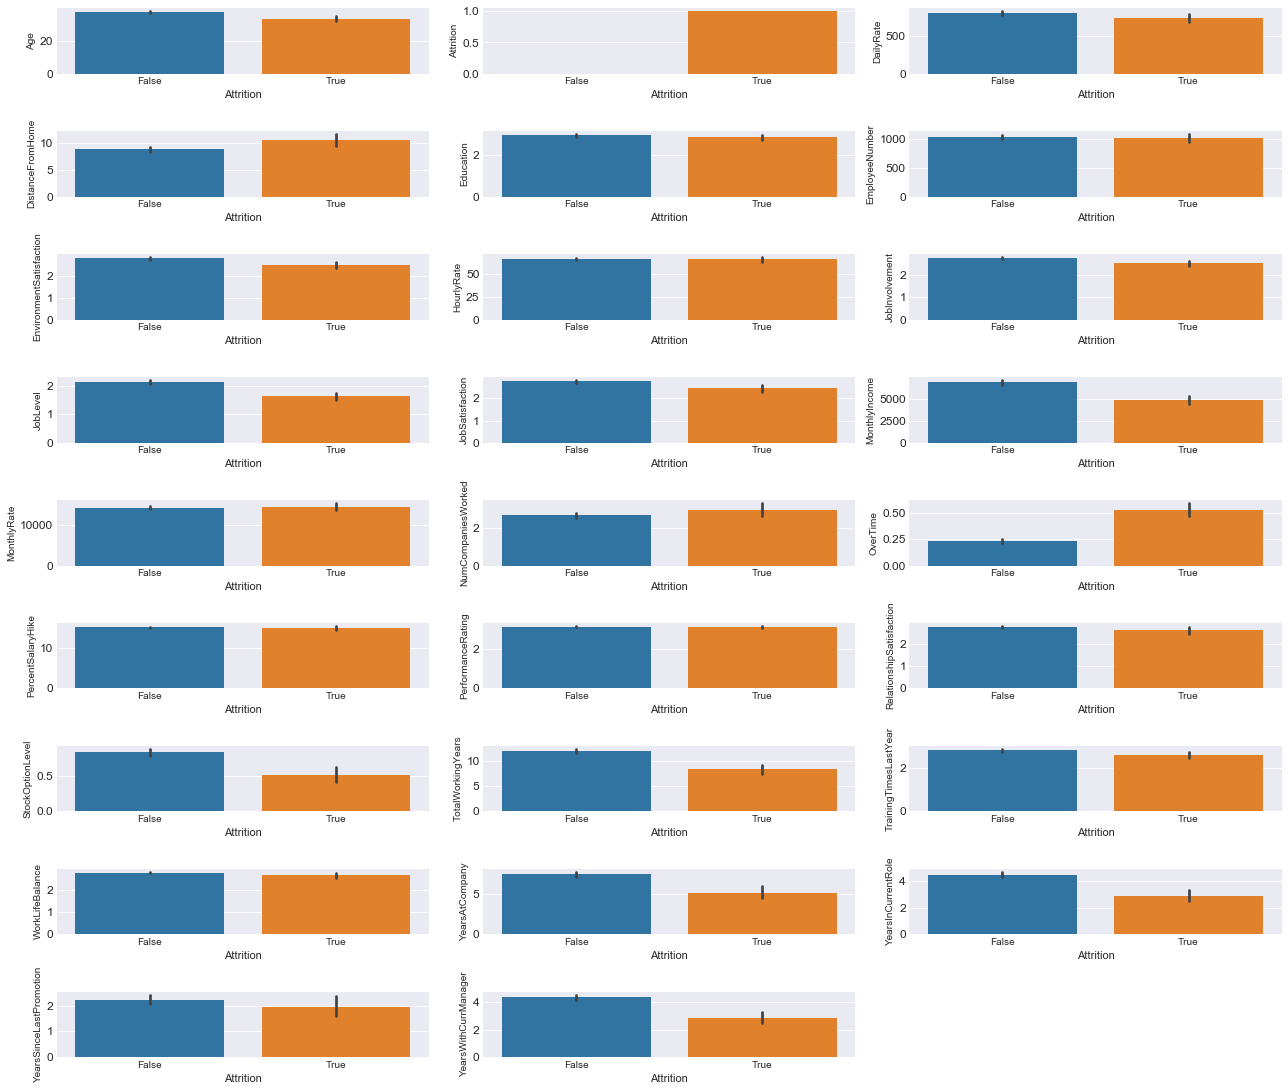

In [58]:
num_plotter(columns=numeric_columns, groupby="Attrition")

We wondered how various variables related to job satisfaction. Obvious stuff: higher job satisfaction indicates lower attrition. Even if something is "obvious", it's much better that it be proven. 

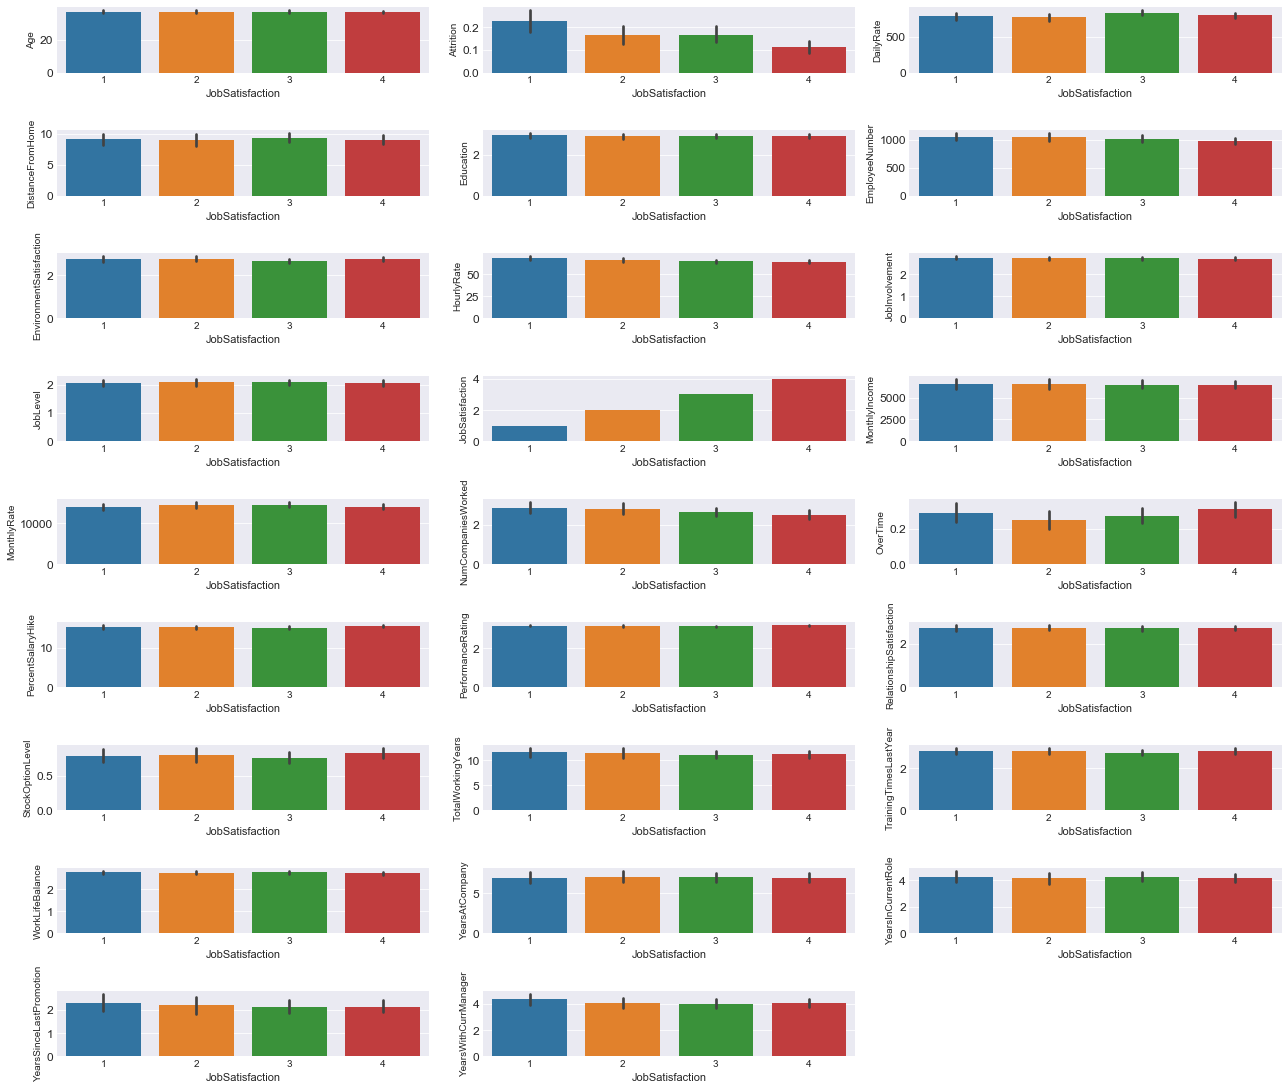

In [59]:
num_plotter(columns=numeric_columns, groupby="JobSatisfaction")

Our fictional dataset lacks significant gender disparity. 

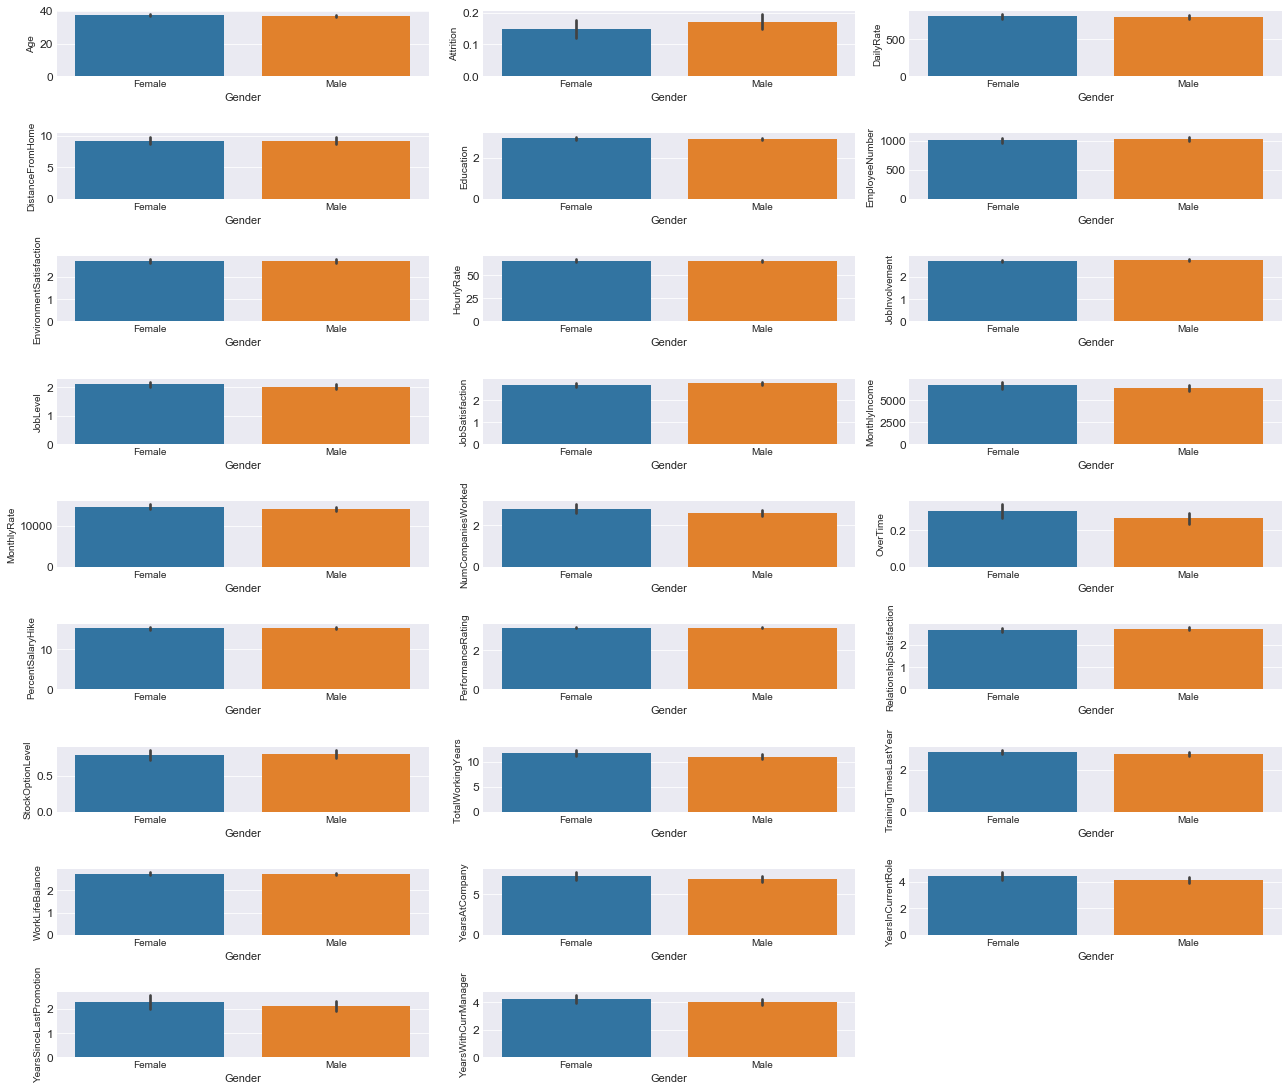

In [60]:
num_plotter(columns=numeric_columns, groupby="Gender")

It looks like R&D positions are relatively stable. 

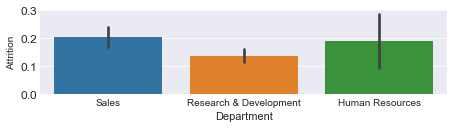

In [61]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="Department" )

The type of educational attainment has an impact.

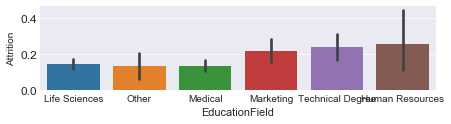

In [62]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="EducationField" )

Marital status has an impact as well. This could be indicative of other factors, such as age.

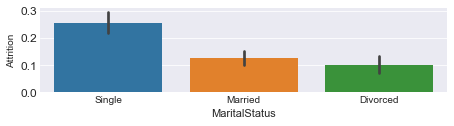

In [63]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="MaritalStatus")

Sales representatives are the least stable, whereas research directors are the most stable.

/Users/chrishemphill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


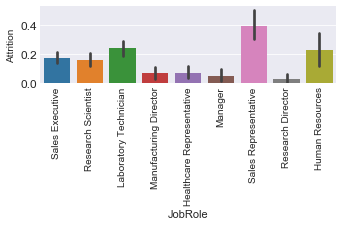

In [64]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="JobRole", rot=90)

Look at the difference in attrition rate for this variable.

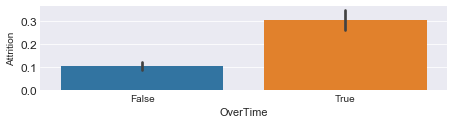

In [65]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="OverTime")

And among the travelers

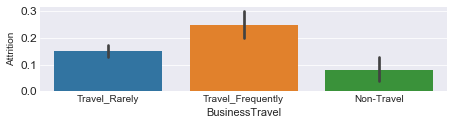

In [66]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="BusinessTravel")

And divided by sex

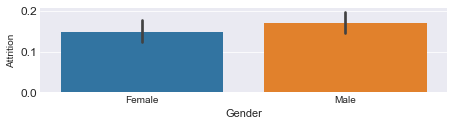

In [67]:
num_plotter(data=ibm_hr_data, columns=["Attrition"], groupby="Gender")

Let's unpack a different way to calculate the impact of these variables. Here, you see how we can chain together multiple functions to produce desired values. 

In [68]:
percent_differences = ibm_hr_data.groupby("Attrition").mean().pct_change().iloc[1].sort_values()
display(percent_differences)

StockOptionLevel           -0.375896
YearsInCurrentRole         -0.352624
YearsWithCurrManager       -0.346906
TotalWorkingYears          -0.305001
YearsAtCompany             -0.303733
MonthlyIncome              -0.299389
JobLevel                   -0.237119
YearsSinceLastPromotion    -0.129449
JobSatisfaction            -0.111652
EnvironmentSatisfaction    -0.110835
Age                        -0.105258
JobInvolvement             -0.090775
DailyRate                  -0.076482
TrainingTimesLastYear      -0.073583
RelationshipSatisfaction   -0.049315
WorkLifeBalance            -0.044154
Education                  -0.029841
EmployeeNumber             -0.016844
PercentSalaryHike          -0.008804
HourlyRate                 -0.005736
PerformanceRating           0.000899
MonthlyRate                 0.020576
NumCompaniesWorked          0.111638
DistanceFromHome            0.192612
OverTime                    1.286234
Name: True, dtype: float64

We can then plot the variable to more easily see the impact.

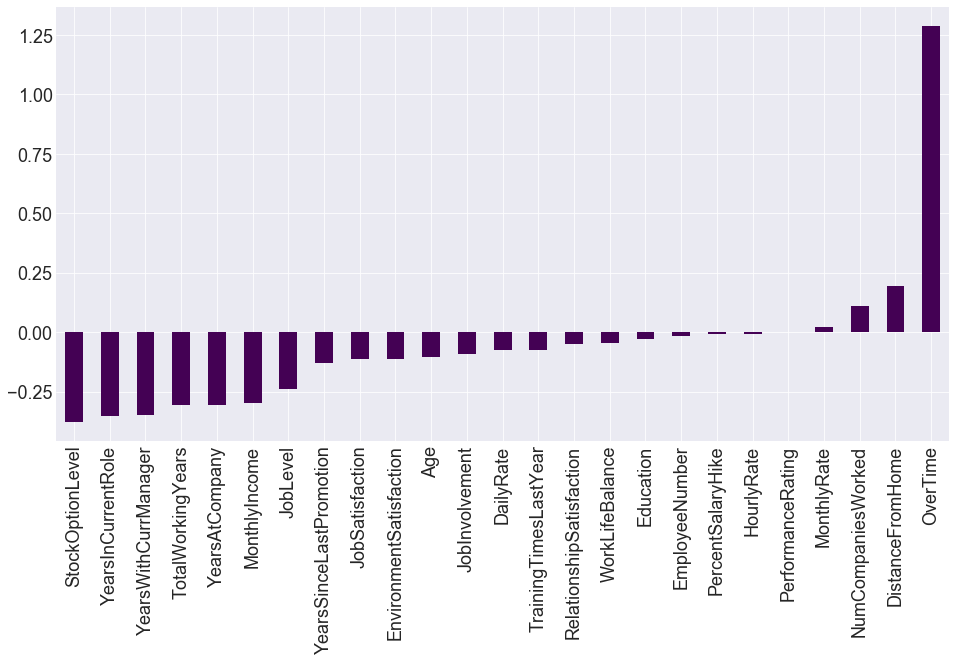

In [69]:
ax = percent_differences.plot(kind="bar", figsize=(16, 8), cmap="viridis", fontsize=18)

Are any of these variables related to each other? We run a simple Pearson correlation to find out. 

In [70]:
data_correlations = ibm_hr_data[numeric_columns + ['Attrition']].corr()
display(data_correlations)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,1.000000
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.007782,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.003507,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,0.000544,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105


In [72]:
def heatmap_view(correlation_table, fontsize=20):
    """Intakes a correlation table and outputs a heatmap. """

    plt.figure(figsize=(18, 16))
    sns.heatmap(correlation_table.round(2), annot=True, cmap="plasma", robust=True, square=True)
    plt.yticks(fontsize=fontsize-8)
    plt.xticks(fontsize=fontsize-8)
    
    return

And to more easily see extreme values in how these numbers relate to each other, we use a heat map. 

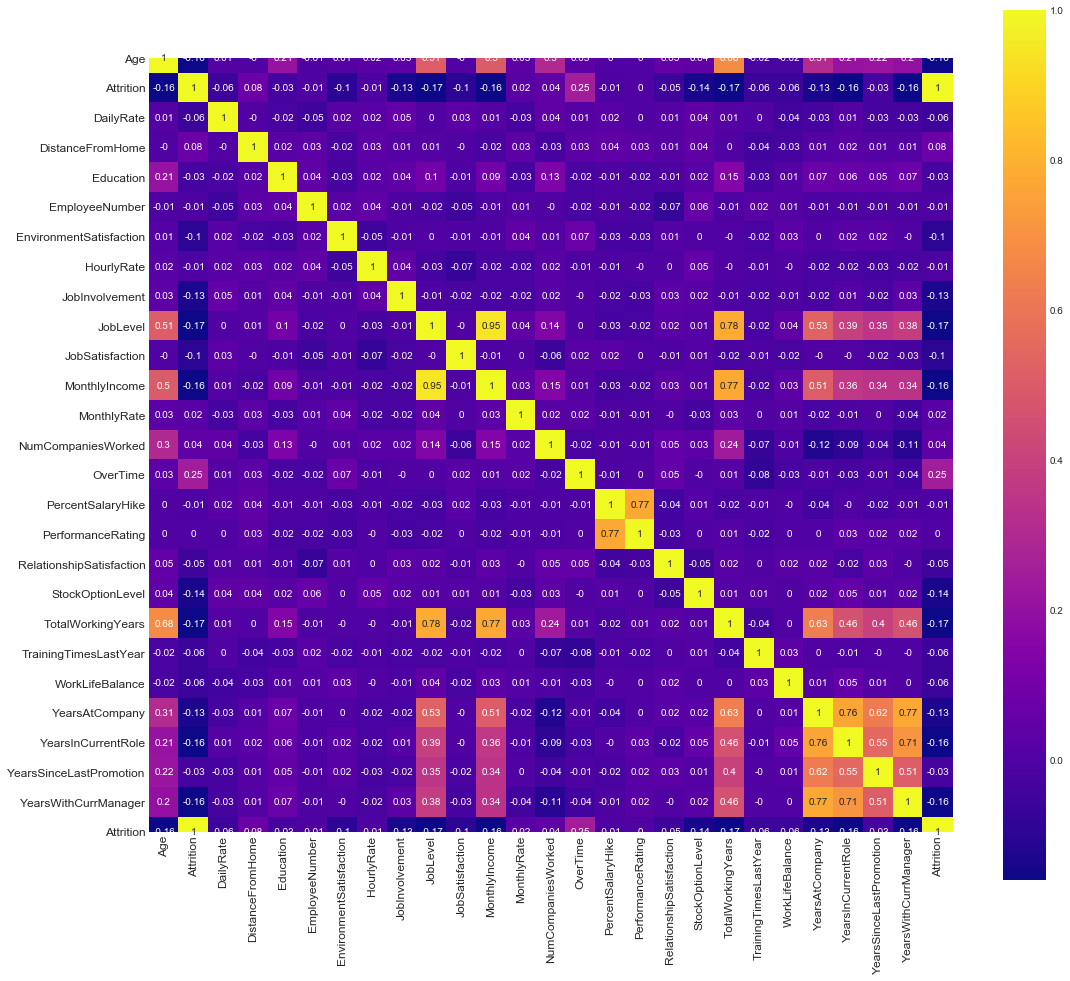

In [73]:
heatmap_view(correlation_table=data_correlations)

We can use a pairplot to see distributions and how variables correlate with each other. 

In [74]:
top_difference_columns = percent_differences.abs()[:10].index

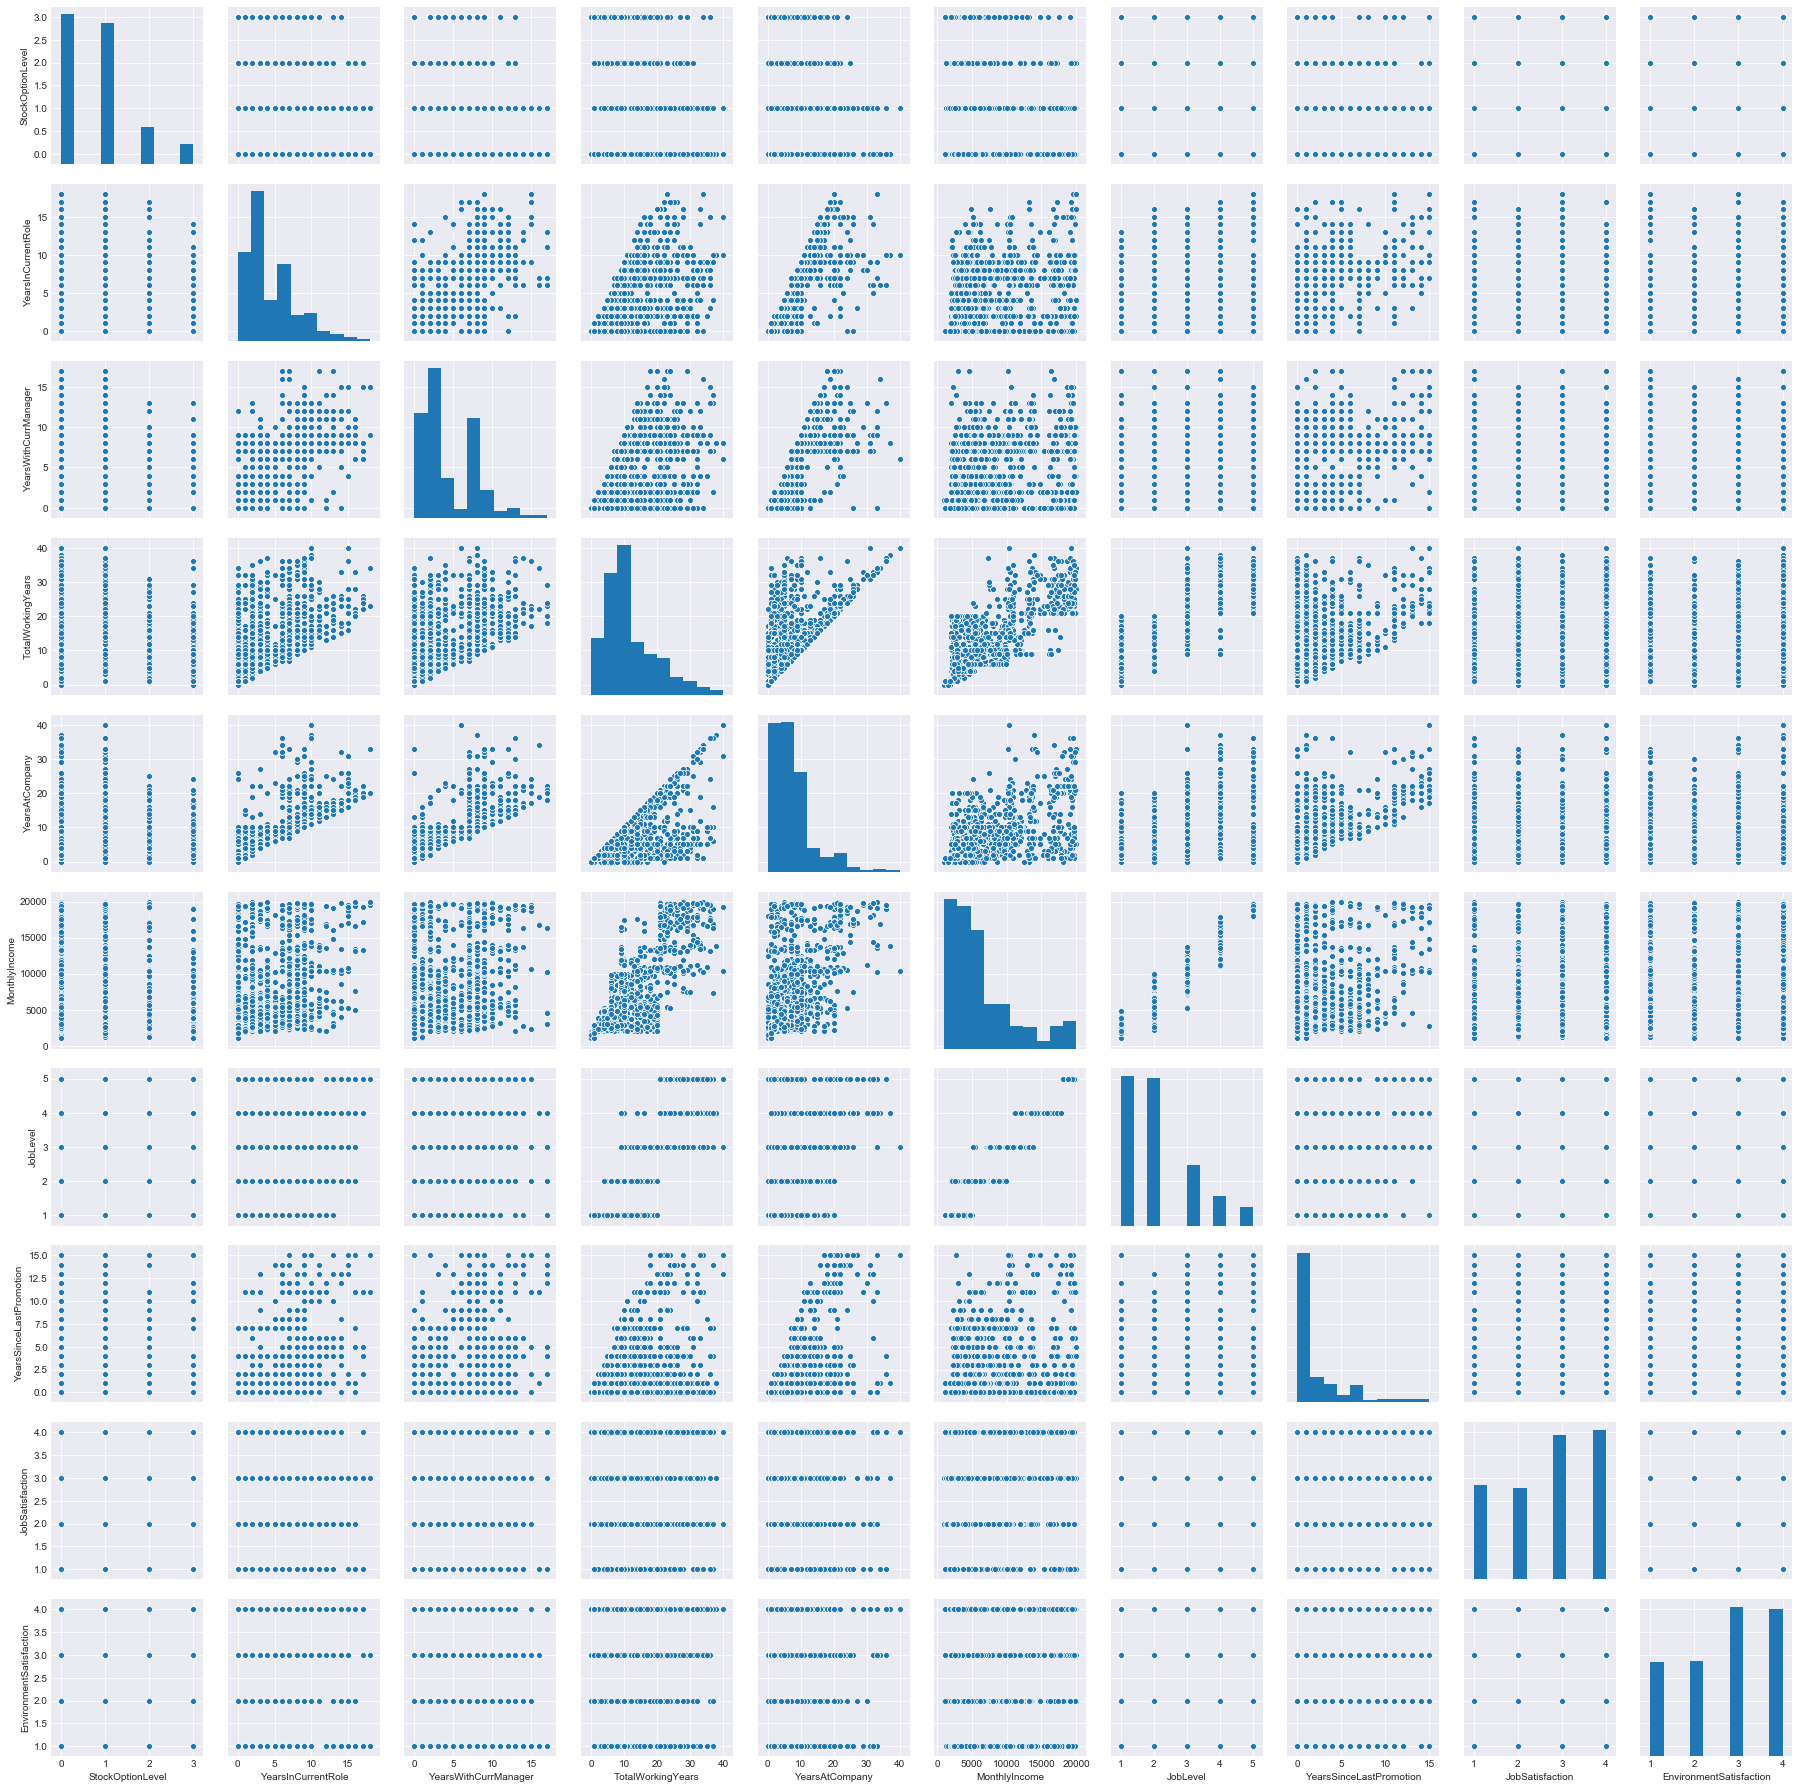

In [75]:
sns.pairplot(ibm_hr_data[top_difference_columns]);

#### Predictive Modeling with sklearn

Selecting the right algorithm in sklearn...
![ML Map](./assets/ml_map.png)

##### How to Handle the Data

Each class of algorithms comes with different considerations in how we work to obtain & measure predictions reliably. 

Because we're predicting a "True", "False" value, our work here will have to fall into the "Classification" category. 

What we're concerned with is how well the model outputs a probability that an employee will quit versus stay. 

Classification algorithms look for patterns in the data that are related to the output variable, the "y" variable, that we're trying to predict. Companies value these algorithms highly when they're able to perform well on new instances or new cases not seen in the original dataset. New cases not seen in the original data are called out-of-sample.

- Why is it important to perform well on out-of-sample data? 



a: 

How do we prepare for how well the model will perform on out-of-sample data, considering we can only train based on data we have available?

In [76]:
from sklearn.model_selection import train_test_split

def data_prep(df, features, target):
    """Input a DataFrame, a list of features, and a target column in order to get reliable
    training and test datasets that we can use to train and measure models.
    
    df(DataFrame): The DataFrame we're modeling
    features(list): Always input this as a list. These are the columns we're using to train the model. Always enter this as a list, and exclude your target variable.
    target(str): This is the name of the target column"""
        
    if target in features:
        raise ValueError("Your target is in your feature set. Please exclude your target variable from your features") 
    
    y = df[target]
    df = df[features].copy()
    
    categorical_features = list(df[features].dtypes[df.dtypes == "object"].index)
    
    if len(categorical_features) > 0:
        print("Processing Categorical Features: ")
        df = categorical_prep(df=df, categorical_columns=categorical_features)
        

        df = df.drop(columns=categorical_features)
        features = list(df.columns)
    
    # Split the dataframe into the feature columns & the target column    
    X = df[features]

    # This establishes a split where the model will train on 2/3rds of the data. The "Test" data is the remaining 33%.
    # By splitting into these sets, we're able to mimic the effect of performance on out-of-sample data. 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=10)
    
    return X_train, X_test, y_train, y_test

In [77]:
def categorical_prep(df, categorical_columns):
    """Prepares categorical columns for machine learning tasks"""
    
    # loop over the columns identified as categorical
    for col in categorical_columns:
        dummies = pd.get_dummies(df[col])  # form a matrix of 1's and 0's representing the categories
        print(col)
        dummy_col_list = list(dummies.columns)
        
        dummy_cols = []
        
        for column in dummy_col_list:
            dummy_cols.append(str(col) + "_" + str(column))  # Names the columns so they're more easily understood
            
        dummies.columns = dummy_cols
        
        display(dummies.head(3))
        
        df = pd.concat([df, dummies], axis=1)
        
    return df

Determining my Features

Feature engineering is the process of selecting, creating, or processing features to prepare for machine learning algorithms.

Above, we saw a numeric and categorical features that showed high association with attrition. We want to incorporate these into our model. 

In [78]:
ibm_hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [80]:
target = "Attrition"
exclude_columns = ["Gender", "MaritalStatus"]
exclude_columns.append(target)
features = [feature for feature in ibm_hr_data.columns if feature not in exclude_columns]  # List comprehensions are a way to quickly populate your lists
                                                                                           # Notice that it's iterating over each column
    
print(features, f"\n\nWe're starting with {len(features)} features, but further engineering could yield more features.")

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

We're starting with 29 features, but further engineering could yield more features.


In [81]:
exclude_columns

['Gender', 'MaritalStatus', 'Attrition']

In [82]:
features

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

![Data Flow](./assets/data_flow.png)

In [83]:
X_train, X_test, y_train, y_test = data_prep(df=ibm_hr_data, features=features, target=target)

Processing Categorical Features: 
BusinessTravel


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1


Department


,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0


EducationField


,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0


JobRole


,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0


In [84]:
# .shape is a fast, common way to see how many rows and columns a dataframe, matrix, or an array has. 
# the first number is number of rows, the second is number of columns

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(984, 46)

(486, 46)

(984,)

(486,)

In [85]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
661,43,177,8,3,920,1,55,3,2,2,4765,23814,4,False,21,4,3,1,4,2,4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
993,25,1372,18,1,1399,1,93,4,2,3,6232,12477,2,False,11,3,2,0,6,3,2,3,2,1,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1171,40,1329,7,3,1649,1,73,3,1,1,2166,3339,3,True,14,3,2,0,10,3,1,4,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1129,42,1059,9,2,1595,4,93,2,5,4,19613,26362,8,False,22,4,4,0,24,2,3,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1360,31,471,4,3,1916,1,62,4,1,3,3978,16031,8,False,12,3,2,1,4,0,2,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,27,954,9,3,1965,4,44,3,2,4,4105,5099,1,False,14,3,1,0,7,5,3,7,7,0,7,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1344,37,783,7,4,1885,4,78,3,2,1,4284,13588,5,True,22,4,3,1,16,2,3,5,3,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
527,32,929,10,3,722,4,55,3,2,4,5396,21703,1,False,12,3,4,0,10,2,2,10,7,0,8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1149,27,1302,19,3,1619,4,67,2,1,1,4066,16290,1,False,11,3,1,2,7,3,3,7,7,0,7,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [86]:
# Classification algorithms. In reality, there are many others to try,
# but given the challenge at hand, these are highly explainable, fast,
# and robust to the categorical data we're dealing with
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Visualization tools that will help us visualize our decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def tree_fit_viz(X_train, y_train, depth=4, viz=True):
    """Fits a decision tree to prepared training data.
    
    Make sure that you've appropriately divided the data before 
    fitting your model. With viz set to True, returns a 
    visualization of a single decision tree fit to the dat."""
    
    # Instantiate the model
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 45)
    
    # fit it to the data
    clf.fit(X_train, y_train)
    
    # Visualize the decision tree if viz is set to true
    if viz == True:
        dot_data = StringIO()
        export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,
                        special_characters=True, feature_names=list(X_train.columns), max_depth=depth)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        display(Image(graph.create_png()))
        
        # Extract and display feature importance
        importance = zip(list(X_train.columns), clf.feature_importances_)
        importance_ranks = pd.Series(dict(importance))
        importance_ranks_significant = (importance_ranks[importance_ranks > 0]).sort_values(ascending=False) * 100

        ax = importance_ranks_significant.sort_values().plot(kind="barh", figsize=(10,7), title="Feature Importance", cmap="viridis")
        display(ax);
    
    return clf

/Users/chrishemphill/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


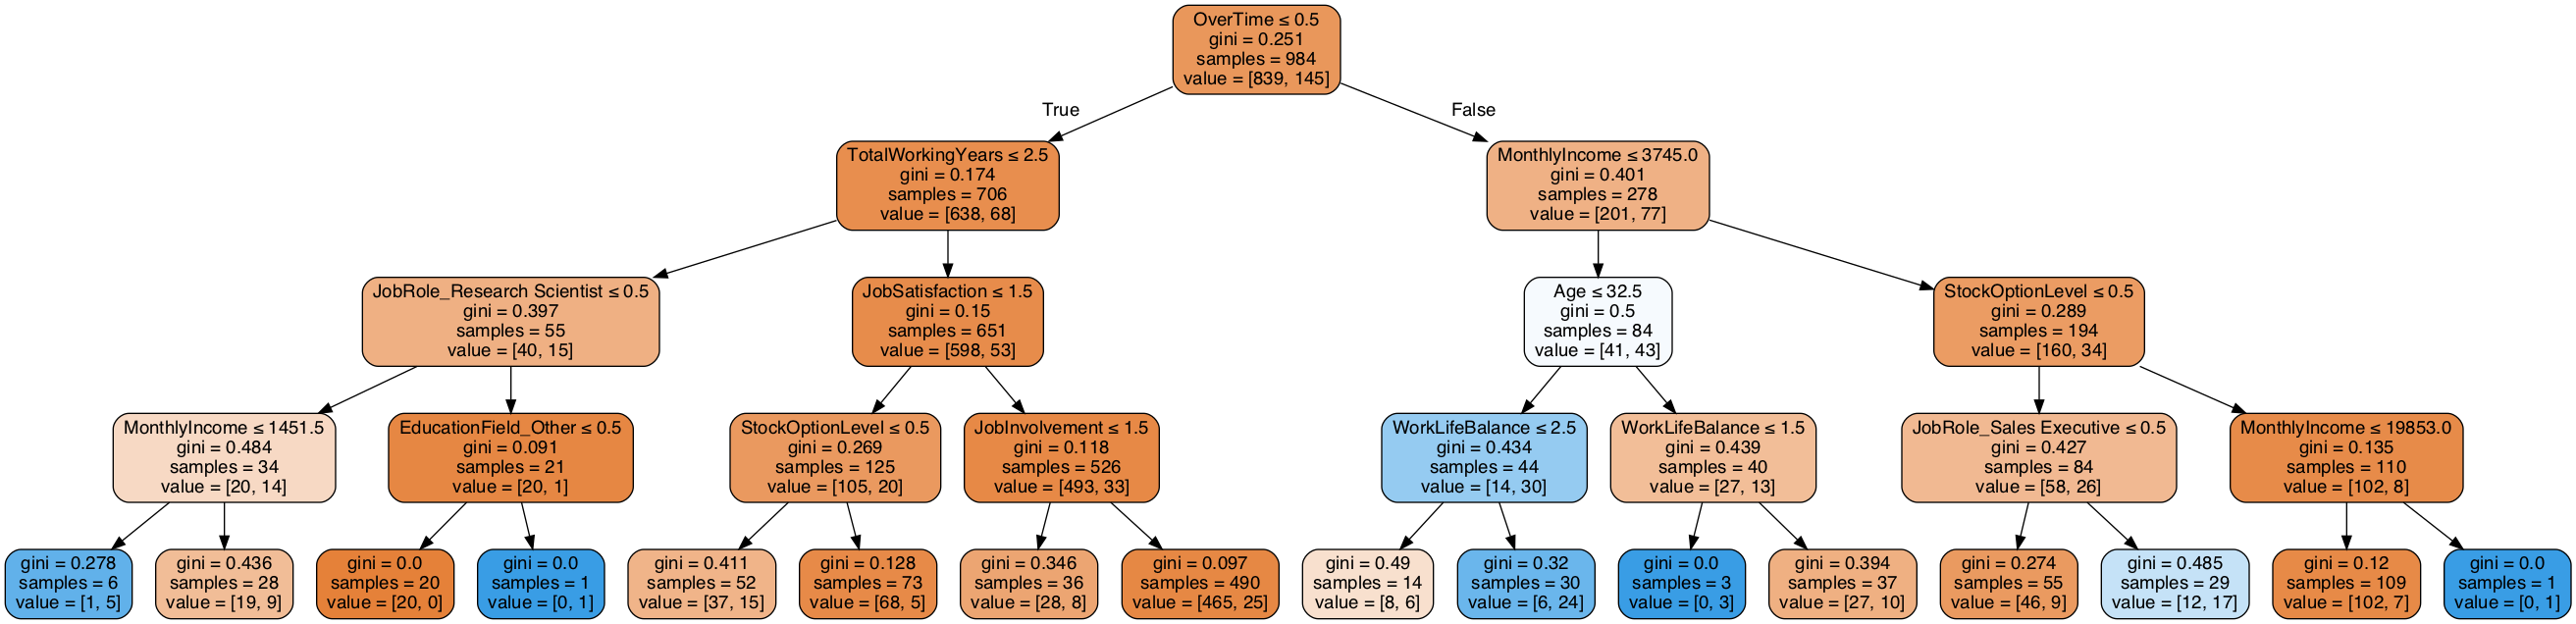

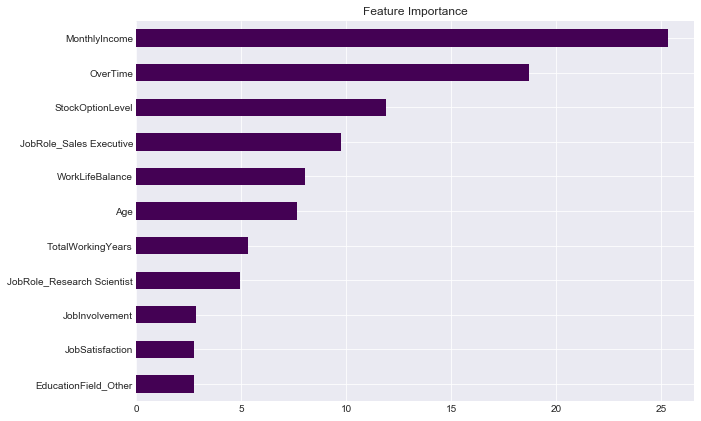

In [89]:
decision_tree = tree_fit_viz(X_train, y_train, depth=4);

### Predictions, Metrics, & Interpretations

Recall that the original framing was that it's worthwhile to pursue predictive modeling only if we find that we can outperform random performance or simply applying the majority class and assuming no one will quit. Let's check our accuracy results for random, majority class application, and our decision tree. 

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [91]:
print(f"We'll be making {len(y_test)} predictions, which is the number of values in the test set. Let's create a DataFrame to better track these results")

We'll be making 486 predictions, which is the number of values in the test set. Let's create a DataFrame to better track these results


In [92]:
result_frame = pd.DataFrame({"Real Results": list(y_test),  # The actual results form column 1
                             "Random Results": np.where(np.random.randint(0,2, size= len(y_test)) == 1, True, False),  # We use a random number generator for our random baseline
                             "Random Probabilities": 0.5,  # The probabilities under random results
                             "False Only Column": False,  # For our "False" baseline, reflecting the majority class, this will project "False" all down the column
                             "False Only Probability": 0,  # The predicted probabilities for False only
                             "Tree Results": decision_tree.predict(X_test), # This column reflects what our decision tree observed
                             "Tree Probabilities": decision_tree.predict_proba(X_test)[:,1]})  # Probabilities for the Decision Tree


result_frame

,Real Results,Random Results,Random Probabilities,False Only Column,False Only Probability,Tree Results,Tree Probabilities
0,False,False,0.5,False,0,False,0.051020
1,True,False,0.5,False,0,False,0.321429
2,False,False,0.5,False,0,False,0.051020
3,False,True,0.5,False,0,False,0.051020
4,False,True,0.5,False,0,False,0.288462
...,...,...,...,...,...,...,...
481,False,True,0.5,False,0,False,0.064220
482,False,False,0.5,False,0,False,0.051020
483,False,True,0.5,False,0,False,0.064220
484,False,False,0.5,False,0,False,0.068493


In [93]:
false_only_accuracy = accuracy_score(result_frame['Real Results'], result_frame['False Only Column'])
tree_accuracy = accuracy_score(result_frame['Real Results'], result_frame['Tree Results'])
print(f"Predict No Attrition Accuracy Score: {false_only_accuracy}")
print(f"Decision Tree Accuracy Score: {tree_accuracy}")

Predict No Attrition Accuracy Score: 0.8106995884773662
Decision Tree Accuracy Score: 0.8271604938271605


Our decision tree only barely outperformed saying everything is false! Why would we want to go through the effort of making and using a decision tree? Or should we just find another model?

a: 



We will try another model (random forest) and use metrics that are actually effective for these problems.

In [94]:
%%time

def random_forest_fit(X_train, y_train, depth, trees):
    """Instantiate and output a random forest model based on data and inputs"""
    
    rf = RandomForestClassifier(max_depth=depth, n_estimators=trees, random_state=42)
    rf.fit(X_train, y_train)
    
    return rf

%time random_forest = random_forest_fit(X_train, y_train, depth=10, trees=1000)

result_frame['Random Forest Results'] = random_forest.predict(X_test)
result_frame["Random Forest Probabilities"] = random_forest.predict_proba(X_test)[:,1]

CPU times: user 2.13 s, sys: 41.8 ms, total: 2.17 s
Wall time: 2.2 s
CPU times: user 2.36 s, sys: 44.2 ms, total: 2.4 s
Wall time: 2.43 s


In [95]:
result_frame

,Real Results,Random Results,Random Probabilities,False Only Column,False Only Probability,Tree Results,Tree Probabilities,Random Forest Results,Random Forest Probabilities
0,False,False,0.5,False,0,False,0.051020,False,0.129166
1,True,False,0.5,False,0,False,0.321429,False,0.362284
2,False,False,0.5,False,0,False,0.051020,False,0.114577
3,False,True,0.5,False,0,False,0.051020,False,0.062446
4,False,True,0.5,False,0,False,0.288462,False,0.184876
...,...,...,...,...,...,...,...,...,...
481,False,True,0.5,False,0,False,0.064220,False,0.184147
482,False,False,0.5,False,0,False,0.051020,False,0.035779
483,False,True,0.5,False,0,False,0.064220,False,0.063521
484,False,False,0.5,False,0,False,0.068493,False,0.155667


Real Results             100.000000
Random Results            50.000000
Tree Results              82.716049
Random Forest Results     82.510288
dtype: float64

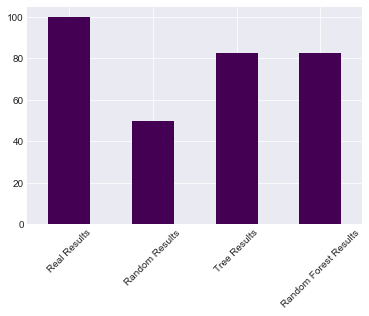

In [96]:
# This is the result of running a pure accuracy metric against the numbers.
model_results = ["Real Results", "Random Results", "Tree Results", "Random Forest Results"]
raw_accuracy_scores = result_frame[model_results].apply(lambda x: (accuracy_score(result_frame["Real Results"], x)*100))
raw_accuracy_scores.plot(kind="bar", rot=45, cmap="viridis")
display(raw_accuracy_scores)

In [97]:
classification_report = pd.DataFrame({"Accuracy Scores": result_frame[model_results].apply(lambda x: (accuracy_score(result_frame["Real Results"], x)*100)),
                                      "Precision Scores": result_frame[model_results].apply(lambda x: (precision_score(result_frame["Real Results"], x)*100)),                                      
                                      "Recall Scores": result_frame[model_results].apply(lambda x: (recall_score(result_frame["Real Results"], x)*100)),
                                      "F1 Scores": result_frame[model_results].apply(lambda x: (f1_score(result_frame["Real Results"], x)*100))})

classification_report

,Accuracy Scores,Precision Scores,Recall Scores,F1 Scores
Real Results,100.000000,100.000000,100.000000,100.000000
Random Results,50.000000,19.433198,52.173913,28.318584
Tree Results,82.716049,60.000000,26.086957,36.363636
Random Forest Results,82.510288,81.818182,9.782609,17.475728


We have reason to believe that the Decision Tree classifier performs the best on this data. However, this is only on predicting "True/False" values. What if we want to select the model that's best at scoring people at various levels of risk? 

For that, we'll need another classification metric called Receiver Operating Characteristic Area Under the Curve, much more commonly called AUC. What this does is test model performance at various thresholds. The output is in a familiar format: between 0 and 1, the closer to 1 being the better. This helps at understanding which model to select and put into production. 

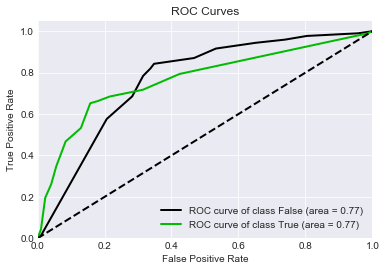

In [98]:
y_probas = decision_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False)
plt.show()

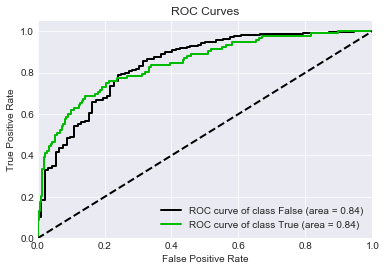

In [100]:
y_probas = random_forest.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False)
plt.show()

Random Probabilities           50.000000
False Only Probability         50.000000
Tree Probabilities             76.709060
Random Forest Probabilities    84.288788
dtype: float64

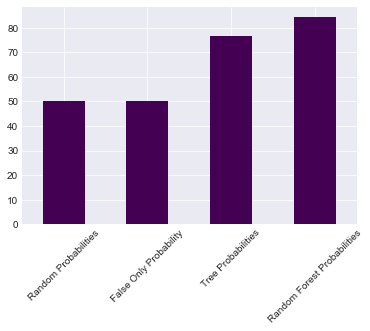

In [102]:
proba_cols = ['Real Results','Random Probabilities', 'False Only Probability', 
              'Tree Probabilities', 'Random Forest Probabilities' ]
proba_frame = result_frame[proba_cols]
proba_roc_auc = proba_frame.iloc[:, 1:].apply(lambda x: roc_auc_score(proba_frame['Real Results'], x))*100
proba_roc_auc.plot(kind='bar', cmap="viridis", rot=45);
display(proba_roc_auc)

In [231]:
def lift_calc(df, model_col_name, bins=5, real_results="Real Results"):
    """Intakes predictive model probability output and returns the relative lift of various risk categories.
    This is a more laymen-interpretable way to look at the results than ROC curves! Interpretability is
    key for adoption."""
    
    # pd.cut() separates the results into evenly spaced bins. These are our risk categories. Think of them as star rankings.
    df_cut = df.groupby(pd.cut(df[model_col_name], bins=bins))[real_results].agg(["count", "sum"])
    proba_cut = df_cut["sum"]/df_cut["count"]
    
    baseline = round((df[real_results].sum()/len(df))*100, 2)
    
    # We'll change the bin names into easily understood numbers
    proba_cut.index = range(1,len(proba_cut)+1)
    df_cut.index = range(1,len(proba_cut)+1)
    
    # Here, we plot the results as a bar chart
    fontsize=20
    
    model = model_col_name.replace('Probabilities', 'Model')
    
    x1, y1 = [-1, bins], [baseline, baseline]
    ax = (proba_cut*100).plot(kind="bar", cmap="viridis", figsize=(10,6))
    ax.plot(x1, y1, linestyle="--")
    ax.annotate(f"Average Attrition Risk = {baseline}%", xy=(-.5, baseline-3), fontsize=fontsize-11)
    plt.suptitle("Attrition Probability by Risk Score Lift Chart", fontsize=fontsize-1, y=1.003)
    plt.title(model)
    plt.xlabel("Risk Category (1 = Low Risk, 5 = Highest Risk)", fontsize=fontsize-5)
    plt.ylabel("Actual Attrition %", fontsize=fontsize-3)
    plt.savefig(f"../{model}.png", dpi=800)
    
    # And we present a DataFrame for easier analysis
    lift_frame = pd.concat([df_cut, proba_cut*100], axis=1)
    lift_frame.columns = ["Employees", "Employee Attrition #", "Attrition %"]
    
    return lift_frame

#### Interpretable Communication

The graphics below frame up the results of the models in a way it should be easier to understand. This buckets the models' risk scores in a familiar "5 star" format. Each bar represent the probability of attrition identified in each bucket based on real numbers. For a good model, higher risk buckets should indicate higher probability of attrition. 

,Employees,Employee Attrition #,Attrition %
1,354,31.0,8.757062
2,78,29.0,37.179487
3,27,14.0,51.851852
4,19,14.0,73.684211
5,8,4.0,50.000000


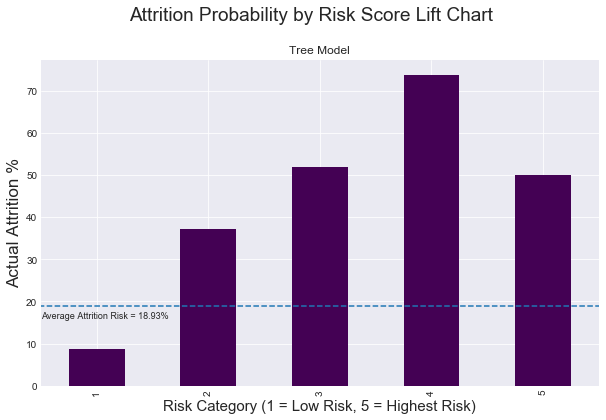

In [232]:
lift_frame = lift_calc(df=proba_frame, model_col_name="Tree Probabilities")
lift_frame

,Employees,Employee Attrition #,Attrition %
1,296,20.0,6.756757
2,125,27.0,21.600000
3,42,26.0,61.904762
4,17,14.0,82.352941
5,6,5.0,83.333333


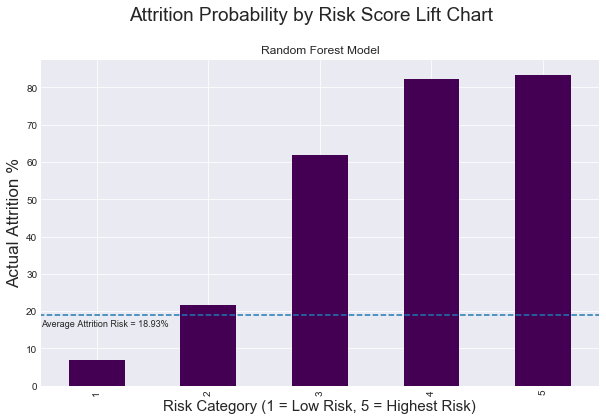

In [233]:
lift_frame = lift_calc(df=proba_frame, model_col_name="Random Forest Probabilities")
lift_frame

### The Results

Based on the results of our modeling, we believe that the data we're collecting on employee engagement has some definite "signal" in predicting attrition. 

Attrition is potentially highly costly, especially with high replacement costs, cultural impact, and corporate knowledge lost when high quality employees leave.

Because of the nuance and sensitivity of the types of interventions we might use given attrition, we are suggesting that the ML model we use be explainable, able to provide reasons for flagging employees as high attrition risk. We will evaluate between Decision Trees and Random Forests to determine which model can be the most effective at reducing undesired attrition.

# You Made It!

![data](https://media.giphy.com/media/zEU2uwmialC4U/giphy.gif)

If you made it this far, that means you're serious about learning this stuff!

Here are some tracks that you can use:
- [DataQuest](https://www.dataquest.io/) - For a self-paced, structured, online journey through initial python skills to data science tasks
- [General Assembly](https://generalassemb.ly/education/data-science-remote-online) - For those who prefer a classroom or online class environment

Who to follow?
- [Kareem Carr](https://twitter.com/kareem_carr) - For your daily dose of data science & statistcs snark
- [Rachel Thomas](https://twitter.com/math_rachel) - Co-founder of fast.ai, Natural Language Processing (NLP) guru, & heading up data ethics initiatives
- [Cathy O'Neil](https://twitter.com/mathbabedotorg) - Weapons of Math Destrution Author, heavy on data ethics
- [Chris Albon](https://twitter.com/chrisalbon) - You'll see his work a ton when you're learning data analysis in pandas, extremely helpful
- [Kevin Markham](https://twitter.com/justmarkham) - Founder of data school, prolific poster of entry level content, great community around learning pandas!
- [Data Science Renee](https://twitter.com/BecomingDataSci) - Great guidance on becoming a data scientist, follow her blog as well!